In [1]:
from pystac_client import Client, ItemSearch
from typing import Any, Dict
import json
import shapely.geometry
from shapely.geometry import Polygon
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from shapely.ops import transform

# SAMPLE_CAT = "https://explorer.sandbox.dea.ga.gov.au/stac/catalogs/aster_green_vegetation/2004-3"
SAMPLE_CAT = "https://explorer.sandbox.dea.ga.gov.au/stac/"
COORDS = ((133.8255, -23.3256), (134.1556, -23.3115), (134.1199, -23.4673), (133.7947, -23.4553)) # NE of Alice Springs AUS
# SAMPLE_CAT = "https://earth-search.aws.element84.com/v1"
AOI: Polygon = Polygon(COORDS)


def coords_to_shapely(coords: tuple) -> Polygon:
    # transform if needed to coord system of target
    return 0

# CREATE STAC CONNECTION
client = Client.open(SAMPLE_CAT)
search = client.search(
    max_items=10,
    collections='aster_green_vegetation',
    intersects=AOI
)
items = search.get_all_items()
result = items.items[0].to_dict()
pystac_item = items.items[0]
print(result)

/home/treuter/repos/geo_py/.venv/lib/python3.10/site-packages/pystac_client/item_search.py:851: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


{'type': 'Feature', 'stac_version': '1.0.0', 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.1.0/schema.json', 'https://stac-extensions.github.io/projection/v1.1.0/schema.json'], 'id': '00e5a6ac-cca6-4244-9c68-3346d728176d', 'geometry': {'type': 'Polygon', 'coordinates': [[[131.9997759984025, -24.000103376334], [131.9997759984025, -19.9998255017495], [138.000053921387, -19.9998255017495], [138.000053921387, -24.000103376334], [131.9997759984025, -24.000103376334]]]}, 'bbox': [131.9997759984025, -24.000103376334, 138.000053921387, -19.9998255017495], 'properties': {'title': 'SF53_Green_Vegetation', 'created': '2012-01-01T00:00:00Z', 'proj:epsg': 4326, 'cubedash:region_code': None, 'datetime': '2004-03-02T00:00:00.500000Z'}, 'links': [{'rel': 'self', 'href': 'https://explorer.sandbox.dea.ga.gov.au/stac/collections/aster_green_vegetation/items/00e5a6ac-cca6-4244-9c68-3346d728176d', 'type': 'application/json'}, {'rel': 'odc_yaml', 'href': 'https://explorer.sandbox.dea.ga.gov.a

In [2]:
# pull straight with link since I dont want to spend time stuck in auth land
rxr = rioxarray.open_rasterio("https://data.dea.ga.gov.au/ASTER_Geoscience_Map_of_Australia/Green_Vegetation/SF53_Green_Vegetation_Band1.tif")


In [18]:
rxr
rxr.rio.crs

CRS.from_epsg(4283)

In [12]:
rxr.rio.crs

project = pyproj.Transformer.from_proj(
    pyproj.Proj(init='epsg:4326'), # source crs
    pyproj.Proj(init='epsg:4283') # dest crs
)
projected_poly = transform(project.transform, AOI)

clip_geom = [
    {
        'type': 'Polygon',
        'coordinates': [list(projected_poly.exterior.coords)]
    }
]
print(clip_geom)
clipped = rxr.rio.clip(clip_geom)

/home/treuter/repos/geo_py/.venv/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/treuter/repos/geo_py/.venv/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


[{'type': 'Polygon', 'coordinates': [[(133.8255, -23.3256), (134.1556, -23.3115), (134.1199, -23.4673), (133.7947, -23.4553), (133.8255, -23.3256)]]}]


/home/treuter/repos/geo_py/.venv/lib/python3.10/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


In [16]:
clipped

<xarray.DataArray (band: 1, y: 561, x: 1299)> Size: 729kB
array([[[ 0,  0,  0, ..., 13, 19, 24],
        [ 0,  0,  0, ...,  6,  7, 24],
        [ 0,  0,  0, ..., 11, 18,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]], dtype=uint8)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 10kB 133.8 133.8 133.8 133.8 ... 134.2 134.2 134.2
  * y            (y) float64 4kB -23.31 -23.31 -23.31 ... -23.47 -23.47 -23.47
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    scale_factor:        1.0
    add_offset:          0.0

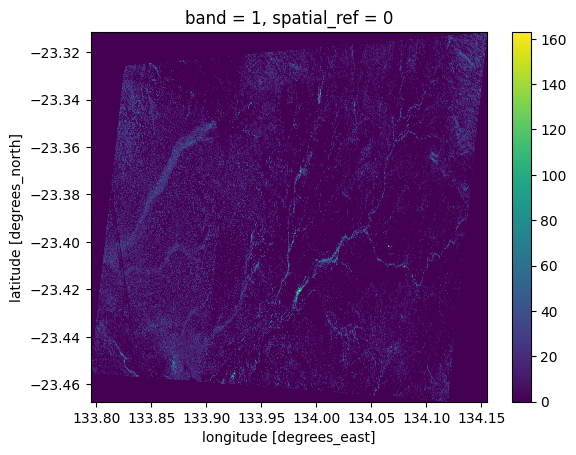

In [17]:
clipped.plot()
plt.show()

In [8]:
rxr.rio.fill.fillnodata()

AttributeError: 'RasterArray' object has no attribute 'fill'

In [5]:
rxr.plot()
plt.show()

RasterioIOError: Read failed. See previous exception for details.